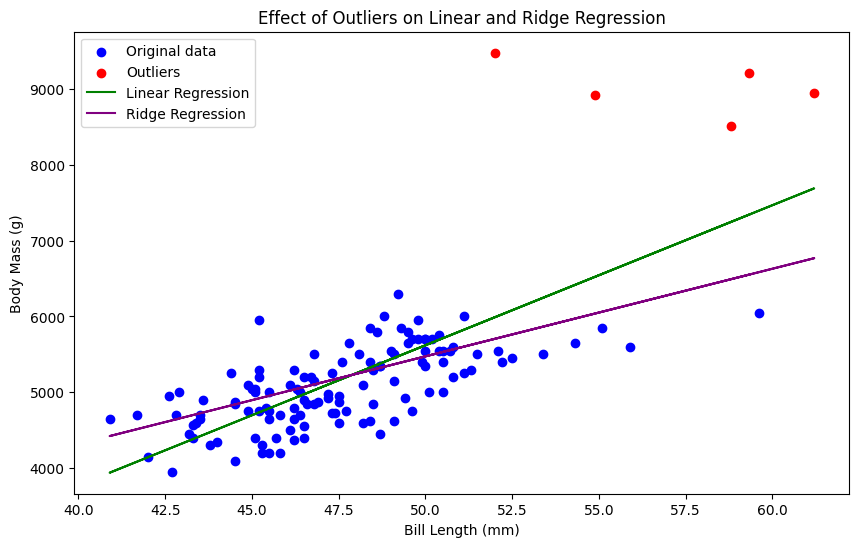

Slope in Linear Regression:  184.55200078405588
Intercept in Linear Regression:  -3607.5834391099033
Mean Squared Error in Linear Regression:  383452.26191625826
Slope in Ridge Regression:  115.45017982770396
Intercept in Ridge Regression:  -298.60117698488193
Mean Squared Error in Ridge Regression:  445778.9623524508


In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# データセットのロード
penguins = sns.load_dataset('penguins')

# NaN値を除去
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Gentooペンギンのデータのみを抽出
gentoo = penguins[penguins.species == 'Gentoo']

# くちばしの長さと体重データを取得
X = gentoo[['bill_length_mm']]
y = gentoo['body_mass_g']

# 外れ値の数
num_outliers = 5

# 外れ値を追加 (ここではくちばしの長さ 50 mm ±5、体重 9000 g ±500 付近のランダムデータを追加)
np.random.seed(0)
outlier_X = pd.DataFrame({'bill_length_mm': 50 + np.random.randn(num_outliers) * 5})
outlier_y = pd.Series(9000 + np.random.randn(num_outliers) * 500)
X = pd.concat([X, outlier_X], ignore_index=True)
y = pd.concat([y, outlier_y], ignore_index=True)

# Linear Regressionモデルの作成と訓練
linear_model = LinearRegression()
linear_model.fit(X, y)

# Ridge Regressionモデルの作成と訓練
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X, y)

# 元のデータと外れ値の予測
y_pred_linear = linear_model.predict(X)
y_pred_ridge = ridge_model.predict(X)

# 平均二乗誤差を計算
mse_lm = mean_squared_error(y, y_pred_linear)
mse_rm = mean_squared_error(y, y_pred_ridge)

# プロット作成
plt.figure(figsize=(10, 6))
plt.scatter(X[:-num_outliers], y[:-num_outliers], color='blue', label='Original data')  # 元のデータ
plt.scatter(X[-num_outliers:], y[-num_outliers:], color='red', label='Outliers')  # 外れ値
plt.plot(X, y_pred_linear, color='green', label='Linear Regression')  # Linear Regressionの結果
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression')  # Ridge Regressionの結果
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Effect of Outliers on Linear and Ridge Regression')
plt.legend()

# 図を保存
plt.savefig('scatter_lr_rr.png')

# グラフを表示
plt.show()

# パラメータの比較
slope_lm = linear_model.coef_[0]
intercept_lm = linear_model.intercept_
print("Slope in Linear Regression: ", slope_lm)
print("Intercept in Linear Regression: ", intercept_lm)
print("Mean Squared Error in Linear Regression: ", mse_lm)

slope_rm = ridge_model.coef_[0]
intercept_rm = ridge_model.intercept_
print("Slope in Ridge Regression: ", slope_rm)
print("Intercept in Ridge Regression: ", intercept_rm)
print("Mean Squared Error in Ridge Regression: ", mse_rm)